In [2]:
import numpy as np
from math import pi, sin
from matplotlib import pyplot as plt
ke = 200
ex = np.zeros(ke)
hy = np.zeros(ke)

In [ ]:
ddx = 0.01 # Cell size
dt = ddx / 6e8 # Time step size
freq_in = 10e9
boundary_low = [0, 0]
boundary_high = [0, 0]

# Create Dielectric Profile
epsz = 8.854e-12
epsilon = 4
sigma = 0.04
ca = np.ones(ke)
cb = np.ones(ke) * 0.5
cb_start = 100
eaf = dt * sigma / (2 * epsz * epsilon)
ca[cb_start:] = (1 - eaf ) / (1 + eaf )
cb[cb_start:] = 0.5 / (epsilon * (1 + eaf ))
nsteps = 500


#𝑒−(𝑛−3𝜏)2/𝜏2
# Main FDTD Loop
for time_step in range(1, nsteps + 1):
# Calculate the Ex field
    for k in range(1, ke):
        ex[k] = ca[k] * ex[k] + cb[k] * (hy[k - 1] - hy[k])
    # Put a sinusoidal at the low end
    pulse = sin(2 * pi * freq_in * dt * time_step)
    ex[5] = pulse + ex[5]
    # Absorbing Boundary Conditions
    ex[0] = boundary_low.pop(0)
    boundary_low.append(ex[1])
    ex[ke - 1] = boundary_high.pop(0)
    boundary_high.append(ex[ke - 2])
    # Calculate the Hy field
    for k in range(ke - 1):
        hy[k] = hy[k] + 0.5 * (ex[k] - ex[k + 1])
# Plot the outputs in Fig. 1.6
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 2.25))
plt.plot(ex, color='k', linewidth=1)
plt.ylabel('E$_x$', fontsize='14')
plt.xticks(np.arange(0, 199, step=20))
plt.xlim(0, 199)
plt.yticks(np.arange(-1, 1.2, step=1))
plt.ylim(-1.2, 1.2)
plt.text(50, 0.5, 'T = {}'.format(time_step),
horizontalalignment='center')
plt.plot((0.5 / cb - 1) / 3, 'k--',
linewidth=0.75) # The math on cb is just for scaling
plt.text(170, 0.5, 'Eps = {}'.format(epsilon),
horizontalalignment='center')
plt.text(170, -0.5, 'Cond = {}'.format(sigma),
horizontalalignment='center')
plt.xlabel('FDTD cells')
plt.subplots_adjust(bottom=0.25, hspace=0.45)
plt.show()

In [ ]:
ddx = 0.01 # Cell size
dt = ddx / 6e8 # Time step size
freq_in = 700e6
boundary_low = [0, 0]
boundary_high = [0, 0]

# Create Dielectric Profile
epsz = 8.854e-12
epsilon = 4
sigma = 0.04
ca = np.ones(ke)
cb = np.ones(ke) * 0.5
cb_start = 100
eaf = dt * sigma / (2 * epsz * epsilon)
ca[cb_start:] = (1 - eaf ) / (1 + eaf )
cb[cb_start:] = 0.5 / (epsilon * (1 + eaf ))
nsteps = 500

# Main FDTD Loop
for time_step in range(1, nsteps + 1):
    # Calculate the Ex field
    for k in range(1, ke):
        ex[k] = ca[k] * ex[k] + cb[k] * (hy[k - 1] - hy[k])
        # Put a sinusoidal at the low end
        pulse = sin(2 * pi * freq_in * dt * time_step)
        ex[5] = pulse + ex[5]
        # Absorbing Boundary Conditions
        ex[0] = boundary_low.pop(0)
        boundary_low.append(ex[1])
        ex[ke - 1] = boundary_high.pop(0)
        boundary_high.append(ex[ke - 2])
    # Calculate the Hy field
    for k in range(ke - 1):
        hy[k] = hy[k] + 0.5 * (ex[k] - ex[k + 1])
# Plot the outputs in Fig. 1.6
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 2.25))
plt.plot(ex, color='k', linewidth=1)
plt.ylabel('E$_x$', fontsize='14')
plt.xticks(np.arange(0, 199, step=20))
plt.xlim(0, 199)
plt.yticks(np.arange(-1, 1.2, step=1))
plt.ylim(-1.2, 1.2)
plt.text(50, 0.5, 'T = {}'.format(time_step),
horizontalalignment='center')
plt.plot((0.5 / cb - 1) / 3, 'k--',
linewidth=0.75) # The math on cb is just for scaling
plt.text(170, 0.5, 'Eps = {}'.format(epsilon),
horizontalalignment='center')
plt.text(170, -0.5, 'Cond = {}'.format(sigma),
horizontalalignment='center')
plt.xlabel('FDTD cells')
plt.subplots_adjust(bottom=0.25, hspace=0.45)
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 17 17:53:17 2020

@author: Maria Camila Hernández Ortiz y Vanessa Restrepo Velásquez 
"""
 # # Simulación de un Radome con el método FDTD (Diferencias Finitas) en 1D
# Segundo laboratorio de Electromagnetismo, Ingeniería Física


#Importar librerias
import numpy as np
from matplotlib import pyplot as plt


#Definicion de variables
Ke = 300 #Número de interacciones en el tiempo (pasos en el tiempo)
Ex = np.zeros(Ke) #Vectores que contiene el campo eléctrico 
Hy = np.zeros(Ke) #Vectores que contiene el campo magnético

# Simulacion con FDTD en 1D
Ddx = 0.001 # Esta en (m) 
Dt = Ddx / 6e8 # Tamaño del paso en el tiempo (Tamaño de celda)
Freq_in = 10e9 #Frecuencia (10-10,5Ghz)

boundary_low = [0, 0] #Matriz 
boundary_high = [0, 0]

# Creación del Material 
Md = np.ones(Ke)  
Md = 0.5 * Md
Md_start = 100 #Inicio del vector 
Md_finish=220  #Fin del vector 
epsilon = 12   #Epsilon del material 
Md[Md_start:Md_finish] = 0.5 / epsilon 

nsteps = 1500

# Seguimiento de los puntos deseados para trazar
plotting_points = [
{'num_steps': 150, 'data_to_plot': None, 'label': ''}, #Evaluó en el punto 150 la propagación, que es el punto de inicio de la propagación
{'num_steps': 1500, 'data_to_plot': None, 'label': 'Posición x(m) FDTD cells'} #Evaluó en el punto 350 la propagación.
]

# Loop FDTD
for time_step in range(1, nsteps + 1):
 # Calcular el campo eléctrico
    
 for k in range(1, Ke):
  Ex[k] = Ex[k] + Md[k] * (Hy[k - 1] - Hy[k])
  
 # Poner una sinusoidal en el extremo inferior
 pulse = sin(2 * pi * Freq_in * Dt * time_step)
 Ex[5] = pulse + Ex[5]
 
 # Condiciones de contorno
 Ex[0] = boundary_low.pop(0)
 boundary_low.append(Ex[1])
 Ex[Ke - 1] = boundary_high.pop(0)
 boundary_high.append(Ex[Ke - 2])
 
 # Calcular el campo mafnético
 for k in range(Ke - 1):
  Hy[k] = Hy[k] + 0.5 * (Ex[k] - Ex[k + 1])
  
  # Guarde los datos en ciertos puntos para su posterior trazado
 for plotting_point in plotting_points:
  if time_step == plotting_point['num_steps']:
   plotting_point['data_to_plot'] = np.copy(Ex)
   
   # Gráfica de las salidas 
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(8, 3.5))

def plot_e_field(data, timestep, epsilon, cb, label):
  """Plot of E field at a single time step"""
  plt.plot(data, color='k', linewidth=1)
  plt.ylabel('E$_x$ (V/m))', fontsize='14')
  plt.xticks(np.arange(0, Ke-1, step=20))
  plt.xlim(0, Ke-1)
  plt.yticks(np.arange(-1, 1.2, step=1))
  plt.ylim(-1.2, 1.2)
  plt.text(50, 0.5, 'T = {}'.format(timestep),
       horizontalalignment='center')
  
  plt.plot((0.5 / Md - 1) / 3, 'b--', linewidth=0.75)
  
  
  # Matemáticas para escalar
  plt.text(150, 0.5, 'Eps = {}'.format(epsilon),
  horizontalalignment='center')
  plt.xlabel('{}'.format(label))
  

# Grafica del campo E en cada uno de los pasos de tiempo guardados anteriormentePlot the E field at each of the time steps saved earlier
for subplot_num, plotting_point in enumerate(plotting_points):
 ax = fig.add_subplot(2, 1, subplot_num + 1)
 plot_e_field(plotting_point['data_to_plot'],
     plotting_point['num_steps'], epsilon, Md,
     plotting_point['label'])
 
plt.subplots_adjust(bottom=0.2, hspace=0.45)
plt.show()


In [ ]:
Dt

In [ ]:
Ddx

In [ ]:
Dt * time_step

In [ ]:
3e8/10e9

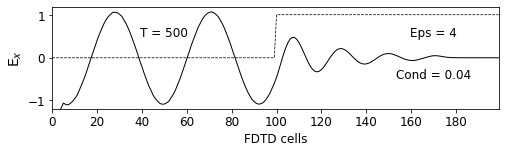

In [3]:
ddx = 0.01 # Cell size
dt = ddx / 6e8 # Time step size
freq_in = 700e6
boundary_low = [0, 0]
boundary_high = [0, 0]
# Create Dielectric Profile
epsz = 8.854e-12
epsilon = 4
sigma = 0.04
ca = np.ones(ke)
cb = np.ones(ke) * 0.5
cb_start = 100
eaf = dt * sigma / (2 * epsz * epsilon)
ca[cb_start:] = (1 - eaf ) / (1 + eaf )
cb[cb_start:] = 0.5 / (epsilon * (1 + eaf ))
nsteps = 500
# Main FDTD Loop
for time_step in range(1, nsteps + 1):
    # Calculate the Ex field
    for k in range(1, ke):
        ex[k] = ca[k] * ex[k] + cb[k] * (hy[k - 1] - hy[k])
    # Put a sinusoidal at the low end
    pulse = sin(2 * pi * freq_in * dt * time_step)
    ex[5] = pulse + ex[5]
    # Absorbing Boundary Conditions
    ex[0] = boundary_low.pop(0)
    boundary_low.append(ex[1])
    ex[ke - 1] = boundary_high.pop(0)
    boundary_high.append(ex[ke - 2])
    # Calculate the Hy field
    for k in range(ke - 1):
        hy[k] = hy[k] + 0.5 * (ex[k] - ex[k + 1])
# Plot the outputs in Fig. 1.6
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 2.25))
plt.plot(ex, color='k', linewidth=1)
plt.ylabel('E$_x$', fontsize='14')
plt.xticks(np.arange(0, 199, step=20))
plt.xlim(0, 199)
plt.yticks(np.arange(-1, 1.2, step=1))
plt.ylim(-1.2, 1.2)
plt.text(50, 0.5, 'T = {}'.format(time_step),
horizontalalignment='center')
plt.plot((0.5 / cb - 1) / 3, 'k--',
linewidth=0.75) # The math on cb is just for scaling
plt.text(170, 0.5, 'Eps = {}'.format(epsilon),
horizontalalignment='center')
plt.text(170, -0.5, 'Cond = {}'.format(sigma),
horizontalalignment='center')
plt.xlabel('FDTD cells')
plt.subplots_adjust(bottom=0.25, hspace=0.45)
plt.show()